<a href="https://colab.research.google.com/github/Jorge2018/prediccion_ventas/blob/main/Test_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:


########### Codigo lee archivo excel desde github
import pandas as pd
import numpy as np
from pandas import DataFrame
import re
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
set_config(display='diagram')


url = "https://github.com/Jorge2018/RepositorioArchivos/blob/main/Fish.xlsx?raw=true"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

df = pd.read_excel(dest)

df.head()



,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [70]:
df.to_csv('Revision'+'.csv', index = False)

**Inspeccion de datos**

In [12]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')
df.describe

la cantidad de registros sin duplicados es:
 Species    155
Weight     159
Length1    157
Length2    157
Length3    150
Height     156
Width      157
dtype: int64
---------------------------
los datos faltantes del df son:
 Species    4
Weight     0
Length1    2
Length2    2
Length3    9
Height     3
Width      2
dtype: int64
---------------------------


<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0      NaN   2.9322  1.8792

[159 rows x 7 columns]>

**Separa valores en X, y**

In [58]:
# Dividan
X = df.drop('Weight', axis=1)
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# Proceso para realizar transformaciones al df

In [59]:
## **Instanciar selectores**
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer, StandardScaler y OneHotEncoder
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

## **Transformacion de datos**
# fit on train
preprocessor.fit(X_train,X_test)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


**Inspeccion de resultados**

In [60]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'valores perdidos en la data de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores perdidos en la data de prueba')
print('\n')
print('Todos los datos procesados del X_train_processed son del tipo:', X_train_processed.dtype)
print('Todos los datos procesados del X_test_processed son del tipo', X_test_processed.dtype)
print('\n')
print('shape de los datos de entrenamiento son', X_train_processed.shape)
print('\n')
print('shape de los datos de test son', X_test_processed.shape)


0 valores perdidos en la data de entrenamiento
0 valores perdidos en la data de prueba


Todos los datos procesados del X_train_processed son del tipo: float64
Todos los datos procesados del X_test_processed son del tipo float64


shape de los datos de entrenamiento son (127, 13)


shape de los datos de test son (32, 13)


**Instancia y proceso del modelo**

In [61]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)
print('El bias calculado es', reg.intercept_)
print('La pendiente calculada es: ', reg.coef_)
print('\n')
print(f'Esto significa que por cada {reg.intercept_} unidad de Weight, el cambio en la pendiente de cada una de sus caracteristicas seran los valores que nos retorna el coef.')

El bias calculado es 436.16247321483877
La pendiente calculada es:  [ 304.27962378  -25.32777769   22.17852406   62.94180057   84.07453362
  -49.12385116  -55.14755639   15.74647051  -18.1100331  -124.93741077
  -31.4282823   288.49787796  -25.49721474]


Esto significa que por cada 436.16247321483877 unidad de Weight, el cambio en la pendiente de cada una de sus caracteristicas seran los valores que nos retorna el coef.


Comparativa entre valor real y la prediccion realizada 

In [62]:
y_pred = reg.predict(X_test_processed)
dfinfo = pd.DataFrame({'Real': y_test.values.flatten(), 'Prediccion': y_pred.flatten()})
dfinfo

,Real,Prediccion
0,120.0,89.054399
1,700.0,693.585439
2,850.0,878.924585
3,130.0,112.358926
4,714.0,733.451192
5,169.0,243.847978
6,430.0,457.740725
7,78.0,0.859639
8,130.0,143.842842
9,19.7,118.460336


Realiza una seleccion de 25 registros y realiza el grafo, tomando como referencia el df recien visto

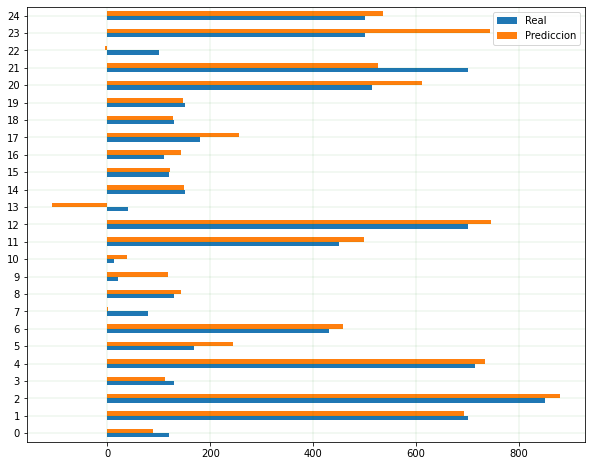

In [63]:
grafo = dfinfo.head(25)
grafo.plot(kind='barh',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Codigo para obtener el R cuadrado (R^2), despues de realizado el ajuste sobre los datos de entrenamiento

In [64]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.9251032617184392


Codigo para obtener el R cuadrado (R^2), despues de realizado el ajuste sobre los datos de prueba

In [65]:
test_score = reg.score(X_test_processed,y_test) # Este valor sale negativo no esta claro el porque
print(test_score)

0.8854738236870737


Codigo para obtener las predicciones de los datos de Entrenamiento y prueba

In [53]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

Error absoluto medio (MAE)

In [66]:
mae_train = mean_absolute_error(y_train, train_preds) # Como se interpretan estos valores?
mae_test = mean_absolute_error(y_test, test_preds)    # Como se interpretan estos valores?
print(mae_train)
print(mae_test)
print('\n')
print('Esto quiere decir que el promedio de ERROR entre valores reales y de prediccion ronda el 5%')

424.266136649028
319.66868969358757


Esto quiere decir que el promedio de ERROR entre valores reales y de prediccion ronda el 5%


Error cuadratico medio (MSE)

In [67]:
mse_train = mean_squared_error(y_train, train_preds) # Como se interpretan estos valores?
mse_test = mean_squared_error(y_test, test_preds)    # Como se interpretan estos valores?
print(mse_train)
print(mse_test)
print('\n')
print('Midiendo el error cuadrado promedio.\n', 
      'Por cada punto, calcula la diferencia entre las predicciones y el objetivo, luego promedia esos valores y los retorna.\n',
      'Cuanto mayor sea este valor, peor es el modelo')

273020.7902162469
157660.70956122046


Midiendo el error cuadrado promedio.
 Por cada punto, calcula la diferencia entre las predicciones y el objetivo, luego promedia esos valores y los retorna.
 Cuanto mayor sea este valor, peor es el modelo


Raiz del error cuadratico medio (RECM)

In [68]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds)) # Como se interpretan estos valores?
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))    # Como se interpretan estos valores?
print(rmse_train)
print(rmse_test)
print('\n')
print('Midiendo el error cuadrado promedio.\n', 
      'Por cada punto, calcula la diferencia entre las predicciones y el objetivo, luego promedia esos valores y los retorna.\n',
      'Cuanto mayor sea este valor, peor es el modelo')

522.513913897273
397.06512005113274


Midiendo el error cuadrado promedio.
 Por cada punto, calcula la diferencia entre las predicciones y el objetivo, luego promedia esos valores y los retorna.
 Cuanto mayor sea este valor, peor es el modelo


**Arbol de Decision**

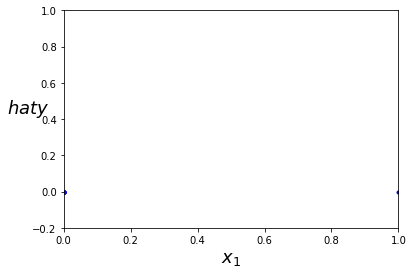

el porcentaje de error de la prediccion total es: 0.9576841683176982


In [86]:
# Crear Arbol de decision con profundidad = 4
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train_processed, y_train)
x1 = X_train_processed
y_pred = tree_reg.predict(x1)
plt.axis([0, 1, -0.2, 1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$hat{y}$", fontsize=18, rotation=0)
plt.plot(X_train_processed, y_train, "b.")
plt.plot(x1, y_pred,"r-", linewidth=2, label=r"$hat{y}$")
#plt.legend(loc="upper center", fontsize=18)
plt.show()
print('el porcentaje de error de la prediccion total es:',tree_reg.score(X_train_processed, y_train))

In [73]:
X_train_processed

array([[-1.13467373,  0.62853336,  0.75648286, ..., -0.1326752 ,
        -0.9574644 , -0.74196028],
       [ 1.78768227,  1.84908602,  0.05545584, ..., -0.83980505,
         0.32054243, -0.74196028],
       [-0.84243813, -0.23870143, -0.1448376 , ..., -0.56969965,
        -1.04266486, -0.74196028],
       ...,
       [-0.84243813, -1.07381641,  0.45604271, ..., -0.33904786,
        -0.36106121, -0.74196028],
       [ 0.03426867, -1.0095768 , -3.44967928, ...,  0.40450069,
        -0.1906603 , -0.74196028],
       [-1.13467373,  0.53217394, -0.44527775, ...,  0.1738489 ,
        -1.04266486,  1.34778105]])